In [1]:
import wrangle_zillow
import explore
import model
import report_before_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Project Overview and Goals
- The project's general idea is to find out what drives the house tax value, this project will contains several different files. 
    * The first will be the acquiring and cleaning file, which gives us a glance of the data we will going to explore next; 
    * The second will be our exploring file, which gives us the opportunity to discovering, assuming and reasoning; 
    * The third will be our modeling, which lets us to predict the house price with the best model.
- The first goal for this project is to explore the database, and find out what drives the house tax market.
- The second goal for this project is to predict the future with our existing known information.
- The third goal is to provide recommendations to a improve our prediction.

## Acquire and Prepare Data

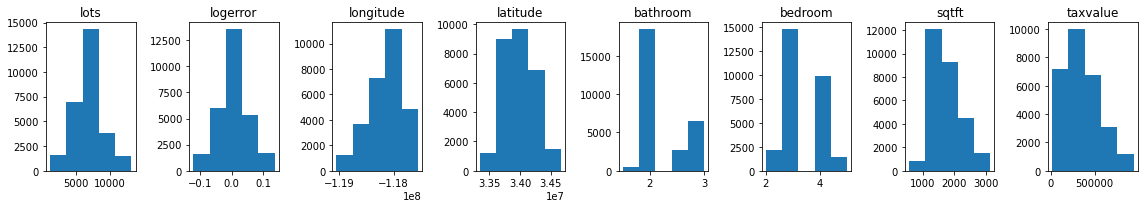

In [2]:
# The original data has outliers and some null values. the wrangle module removed outlers and dropped the null values
# The wrangle module created has a function that split the data to train, validate, and test.
# The wrangle module created month from transaction date and drop the transaction date 
zillow_train, zillow_validate, zillow_test=wrangle_zillow.wrangle_zillow(1.5)

In [3]:
# Retrieved some basic information about the data
zillow_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15782 entries, 40527 to 9701
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lots       15782 non-null  float64
 1   logerror   15782 non-null  float64
 2   longitude  15782 non-null  float64
 3   latitude   15782 non-null  float64
 4   bathroom   15782 non-null  float64
 5   bedroom    15782 non-null  float64
 6   fips       15782 non-null  object 
 7   sqtft      15782 non-null  float64
 8   zipcode    15782 non-null  object 
 9   taxvalue   15782 non-null  float64
 10  county     15782 non-null  object 
 11  month      15782 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 1.6+ MB


### Key Takeaway soooo far
- The bathroom, bedroom, sqtft, and lots size can be scaled.
- The wrangle also created three objects, which translate the fips into county, the zipcode, and fips into object.
- The data contains longitude and latitude, which could helps us to illustrate the location of the house hue by county using scatter plot
- Drop transaction date and only keep month since all transactions are in 2017

In [4]:
# scale the data with MinMaxScaler for a better understanding
scaler,zillow_train_scaled=wrangle_zillow.scale(MinMaxScaler(),zillow_train)

In [5]:
zillow_train_scaled

,lots,logerror,longitude,latitude,bathroom,bedroom,fips,sqtft,zipcode,taxvalue,county,month
40527,0.698355,0.035899,-118400272.0,33781562.0,0.333333,0.666667,6037.0,0.484375,96122.0,118004.0,"Los Angeles County, CA",6
23929,0.428087,-0.001251,-118747794.0,34259587.0,0.333333,0.333333,6111.0,0.260938,97118.0,161697.0,"Ventura County, CA",4
14138,0.465315,-0.010483,-118240023.0,33970709.0,0.333333,0.666667,6037.0,0.585938,95982.0,345184.0,"Los Angeles County, CA",3
17845,0.484311,-0.002885,-118142010.0,33924266.0,0.333333,0.333333,6037.0,0.208594,96102.0,249811.0,"Los Angeles County, CA",3
27574,0.394844,-0.009087,-118100027.0,33952248.0,0.333333,0.000000,6037.0,0.217188,96100.0,392466.0,"Los Angeles County, CA",5
...,...,...,...,...,...,...,...,...,...,...,...,...
14694,0.425712,0.005747,-118365680.0,34077336.0,0.333333,0.666667,6037.0,0.563281,96029.0,700082.0,"Los Angeles County, CA",3
45663,0.299016,-0.053948,-118319458.0,33977931.0,0.333333,0.333333,6037.0,0.306250,96024.0,81140.0,"Los Angeles County, CA",8
8201,0.635940,0.008068,-117787982.0,33884999.0,0.333333,0.666667,6059.0,0.585156,97078.0,87982.0,"Orange County, CA",2
33123,0.506445,-0.014411,-118408198.0,34184479.0,0.333333,0.333333,6037.0,0.491016,96451.0,580000.0,"Los Angeles County, CA",6
